<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_22/blob/main/kmeans_deep_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How it differs from the default solution? 

Here we are using a neural network instead of a logreg

# Load data & default imports

In [2]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import scipy.stats as sstats
import multiprocessing as mp
from sklearn import datasets
import sklearn.linear_model
from tqdm.auto import tqdm
from matplotlib import animation, pyplot, rc
import matplotlib.pyplot as plt
import httpimport
from os.path import join
import os.path
from PIL import Image
import tensorflow as tf

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

from sklearn.feature_extraction import image
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression

from FeaturesExtractor import FeaturesExtractor
from helpers import plot_history

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

!pip install -q gdown httpimport
![ -e cifar.npz ] || gdown 'https://drive.google.com/uc?id=1oBzZdtg2zNTPGhbRy6DQ_wrf5L5OAhNR' -O cifar.npz

with np.load('cifar.npz') as data:
    X_trn = data['train_data']
    y_trn = data['train_labels']
    X_tst = data['test_data']
    y_tst = data['test_labels']

# testing

In [3]:
# All in one place ...

def preprocess(X_trn, y_trn, X_tst, y_tst, PATCH_SIZE, PATCH_NUM, STRIDE, K):

    extractor = FeaturesExtractor(PATCH_SIZE, PATCH_NUM, STRIDE, K)

    kmeans_counts = extractor.fit(X_trn)

    X_trn_features = extractor.extract(X_trn)
    X_tst_features = extractor.extract(X_tst)
    
    return X_trn_features, y_trn, X_tst_features, y_tst

def test_model(X_trn_features, y_trn_categorical, X_tst_features, y_tst_categorical, estimators, depth, subsample, v=True):
    import xgboost as xgb

    model = xgb.XGBClassifier(
        n_estimators = estimators,
        num_class = 10,
        max_depth = depth,
        seed = 69,
        eval_metric = 'merror',
        subsample=subsample
    )

    model.fit(X_trn_features, y_trn, verbose = v, eval_set = [(X_tst_features, y_tst)])

    # Save the model's weights
    model.save_model('xgboost_220_10_new_patches.bin')

    accuracy = model.score(X_tst_features, y_tst)

    if v:
        print('Accuracy:', accuracy)
    return accuracy, model

    

In [ ]:
history220 = """
[0]	validation_0-merror:0.63950
[1]	validation_0-merror:0.59930
[2]	validation_0-merror:0.57680
[3]	validation_0-merror:0.55780
[4]	validation_0-merror:0.54220
[5]	validation_0-merror:0.53490
[6]	validation_0-merror:0.52710
[7]	validation_0-merror:0.52420
[8]	validation_0-merror:0.51860
[9]	validation_0-merror:0.51290
[10]	validation_0-merror:0.50550
[11]	validation_0-merror:0.49900
[12]	validation_0-merror:0.49650
[13]	validation_0-merror:0.49450
[14]	validation_0-merror:0.49320
[15]	validation_0-merror:0.48780
[16]	validation_0-merror:0.48520
[17]	validation_0-merror:0.48320
[18]	validation_0-merror:0.48050
[19]	validation_0-merror:0.47830
[20]	validation_0-merror:0.47910
[21]	validation_0-merror:0.47420
[22]	validation_0-merror:0.47200
[23]	validation_0-merror:0.46960
[24]	validation_0-merror:0.46730
[25]	validation_0-merror:0.46450
[26]	validation_0-merror:0.46560
[27]	validation_0-merror:0.46150
[28]	validation_0-merror:0.45970
[29]	validation_0-merror:0.45710
[30]	validation_0-merror:0.45660
[31]	validation_0-merror:0.45370
[32]	validation_0-merror:0.45390
[33]	validation_0-merror:0.45160
[34]	validation_0-merror:0.45070
[35]	validation_0-merror:0.44760
[36]	validation_0-merror:0.44720
[37]	validation_0-merror:0.44600
[38]	validation_0-merror:0.44450
[39]	validation_0-merror:0.44340
[40]	validation_0-merror:0.44240
[41]	validation_0-merror:0.44190
[42]	validation_0-merror:0.43960
[43]	validation_0-merror:0.43880
[44]	validation_0-merror:0.43760
[45]	validation_0-merror:0.43620
[46]	validation_0-merror:0.43620
[47]	validation_0-merror:0.43500
[48]	validation_0-merror:0.43280
[49]	validation_0-merror:0.43280
[50]	validation_0-merror:0.43150
[51]	validation_0-merror:0.42970
[52]	validation_0-merror:0.42760
[53]	validation_0-merror:0.42750
[54]	validation_0-merror:0.42650
[55]	validation_0-merror:0.42520
[56]	validation_0-merror:0.42360
[57]	validation_0-merror:0.42220
[58]	validation_0-merror:0.42200
[59]	validation_0-merror:0.42280
[60]	validation_0-merror:0.42210
[61]	validation_0-merror:0.42070
[62]	validation_0-merror:0.42000
[63]	validation_0-merror:0.42050
[64]	validation_0-merror:0.41990
[65]	validation_0-merror:0.41860
[66]	validation_0-merror:0.41800
[67]	validation_0-merror:0.41680
[68]	validation_0-merror:0.41580
[69]	validation_0-merror:0.41470
[70]	validation_0-merror:0.41310
[71]	validation_0-merror:0.41300
[72]	validation_0-merror:0.41100
[73]	validation_0-merror:0.41120
[74]	validation_0-merror:0.41140
[75]	validation_0-merror:0.41180
[76]	validation_0-merror:0.40990
[77]	validation_0-merror:0.40890
[78]	validation_0-merror:0.40750
[79]	validation_0-merror:0.40720
[80]	validation_0-merror:0.40680
[81]	validation_0-merror:0.40680
[82]	validation_0-merror:0.40690
[83]	validation_0-merror:0.40850
[84]	validation_0-merror:0.40840
[85]	validation_0-merror:0.40690
[86]	validation_0-merror:0.40620
[87]	validation_0-merror:0.40520
[88]	validation_0-merror:0.40500
[89]	validation_0-merror:0.40270
[90]	validation_0-merror:0.40190
[91]	validation_0-merror:0.40250
[92]	validation_0-merror:0.40260
[93]	validation_0-merror:0.40240
[94]	validation_0-merror:0.40100
[95]	validation_0-merror:0.40070
[96]	validation_0-merror:0.40060
[97]	validation_0-merror:0.39980
[98]	validation_0-merror:0.39950
[99]	validation_0-merror:0.39890
[100]	validation_0-merror:0.39940
[101]	validation_0-merror:0.39810
[102]	validation_0-merror:0.39940
[103]	validation_0-merror:0.39900
[104]	validation_0-merror:0.39850
[105]	validation_0-merror:0.39680
[106]	validation_0-merror:0.39690
[107]	validation_0-merror:0.39630
[108]	validation_0-merror:0.39580
[109]	validation_0-merror:0.39510
[110]	validation_0-merror:0.39480
[111]	validation_0-merror:0.39440
[112]	validation_0-merror:0.39510
[113]	validation_0-merror:0.39500
[114]	validation_0-merror:0.39560
[115]	validation_0-merror:0.39450
[116]	validation_0-merror:0.39330
[117]	validation_0-merror:0.39360
[118]	validation_0-merror:0.39370
[119]	validation_0-merror:0.39370
[120]	validation_0-merror:0.39300
[121]	validation_0-merror:0.39300
[122]	validation_0-merror:0.39200
[123]	validation_0-merror:0.39180
[124]	validation_0-merror:0.39100
[125]	validation_0-merror:0.39170
[126]	validation_0-merror:0.39120
[127]	validation_0-merror:0.39140
[128]	validation_0-merror:0.39150
[129]	validation_0-merror:0.39100
[130]	validation_0-merror:0.39000
[131]	validation_0-merror:0.38890
[132]	validation_0-merror:0.38880
[133]	validation_0-merror:0.38750
[134]	validation_0-merror:0.38760
[135]	validation_0-merror:0.38740
[136]	validation_0-merror:0.38770
[137]	validation_0-merror:0.38760
[138]	validation_0-merror:0.38790
[139]	validation_0-merror:0.38690
[140]	validation_0-merror:0.38700
[141]	validation_0-merror:0.38640
[142]	validation_0-merror:0.38620
[143]	validation_0-merror:0.38630
[144]	validation_0-merror:0.38550
[145]	validation_0-merror:0.38550
[146]	validation_0-merror:0.38520
[147]	validation_0-merror:0.38470
[148]	validation_0-merror:0.38550
[149]	validation_0-merror:0.38470
[150]	validation_0-merror:0.38470
[151]	validation_0-merror:0.38450
[152]	validation_0-merror:0.38350
[153]	validation_0-merror:0.38180
[154]	validation_0-merror:0.38310
[155]	validation_0-merror:0.38240
[156]	validation_0-merror:0.38230
[157]	validation_0-merror:0.38070
[158]	validation_0-merror:0.38100
[159]	validation_0-merror:0.38240
[160]	validation_0-merror:0.38180
[161]	validation_0-merror:0.38210
[162]	validation_0-merror:0.38260
[163]	validation_0-merror:0.38200
[164]	validation_0-merror:0.38150
[165]	validation_0-merror:0.38190
[166]	validation_0-merror:0.38170
[167]	validation_0-merror:0.38150
[168]	validation_0-merror:0.38070
[169]	validation_0-merror:0.38130
[170]	validation_0-merror:0.38050
[171]	validation_0-merror:0.38000
[172]	validation_0-merror:0.38080
[173]	validation_0-merror:0.38020
[174]	validation_0-merror:0.38110
[175]	validation_0-merror:0.38080
[176]	validation_0-merror:0.38070
[177]	validation_0-merror:0.38010
[178]	validation_0-merror:0.38170
[179]	validation_0-merror:0.38120
[180]	validation_0-merror:0.38110
[181]	validation_0-merror:0.38060
[182]	validation_0-merror:0.38010
[183]	validation_0-merror:0.37990
[184]	validation_0-merror:0.38020
[185]	validation_0-merror:0.37970
[186]	validation_0-merror:0.37950
[187]	validation_0-merror:0.38040
[188]	validation_0-merror:0.37950
[189]	validation_0-merror:0.37850
[190]	validation_0-merror:0.37900
[191]	validation_0-merror:0.37930
[192]	validation_0-merror:0.37850
[193]	validation_0-merror:0.37780
[194]	validation_0-merror:0.37830
[195]	validation_0-merror:0.37810
[196]	validation_0-merror:0.37810
[197]	validation_0-merror:0.37890
[198]	validation_0-merror:0.37780
[199]	validation_0-merror:0.37810
[200]	validation_0-merror:0.37700
[201]	validation_0-merror:0.37660
[202]	validation_0-merror:0.37660
[203]	validation_0-merror:0.37650
[204]	validation_0-merror:0.37680
[205]	validation_0-merror:0.37610
[206]	validation_0-merror:0.37600
[207]	validation_0-merror:0.37560
[208]	validation_0-merror:0.37500
[209]	validation_0-merror:0.37480
[210]	validation_0-merror:0.37490
[211]	validation_0-merror:0.37540
[212]	validation_0-merror:0.37490
[213]	validation_0-merror:0.37430
[214]	validation_0-merror:0.37510
[215]	validation_0-merror:0.37520
[216]	validation_0-merror:0.37480
[217]	validation_0-merror:0.37470
[218]	validation_0-merror:0.37490
[219]	validation_0-merror:0.37480
"""

In [ ]:
history250="""[0]	validation_0-merror:0.63470
[1]	validation_0-merror:0.59380
[2]	validation_0-merror:0.57550
[3]	validation_0-merror:0.55850
[4]	validation_0-merror:0.54860
[5]	validation_0-merror:0.54030
[6]	validation_0-merror:0.53240
[7]	validation_0-merror:0.52400
[8]	validation_0-merror:0.51910
[9]	validation_0-merror:0.51540
[10]	validation_0-merror:0.51220
[11]	validation_0-merror:0.50570
[12]	validation_0-merror:0.50160
[13]	validation_0-merror:0.49880
[14]	validation_0-merror:0.49350
[15]	validation_0-merror:0.48750
[16]	validation_0-merror:0.48520
[17]	validation_0-merror:0.48190
[18]	validation_0-merror:0.47830
[19]	validation_0-merror:0.47250
[20]	validation_0-merror:0.47230
[21]	validation_0-merror:0.47040
[22]	validation_0-merror:0.46950
[23]	validation_0-merror:0.46700
[24]	validation_0-merror:0.46450
[25]	validation_0-merror:0.46240
[26]	validation_0-merror:0.46050
[27]	validation_0-merror:0.45850
[28]	validation_0-merror:0.45800
[29]	validation_0-merror:0.45540
[30]	validation_0-merror:0.45460
[31]	validation_0-merror:0.45310
[32]	validation_0-merror:0.45080
[33]	validation_0-merror:0.45080
[34]	validation_0-merror:0.44980
[35]	validation_0-merror:0.44730
[36]	validation_0-merror:0.44710
[37]	validation_0-merror:0.44390
[38]	validation_0-merror:0.44330
[39]	validation_0-merror:0.44150
[40]	validation_0-merror:0.43890
[41]	validation_0-merror:0.43840
[42]	validation_0-merror:0.43580
[43]	validation_0-merror:0.43460
[44]	validation_0-merror:0.43390
[45]	validation_0-merror:0.43400
[46]	validation_0-merror:0.43170
[47]	validation_0-merror:0.43250
[48]	validation_0-merror:0.43170
[49]	validation_0-merror:0.43110
[50]	validation_0-merror:0.42710
[51]	validation_0-merror:0.42790
[52]	validation_0-merror:0.42750
[53]	validation_0-merror:0.42600
[54]	validation_0-merror:0.42390
[55]	validation_0-merror:0.42350
[56]	validation_0-merror:0.42270
[57]	validation_0-merror:0.42360
[58]	validation_0-merror:0.42160
[59]	validation_0-merror:0.42140
[60]	validation_0-merror:0.42040
[61]	validation_0-merror:0.41920
[62]	validation_0-merror:0.41940
[63]	validation_0-merror:0.41950
[64]	validation_0-merror:0.41820
[65]	validation_0-merror:0.41810
[66]	validation_0-merror:0.41770
[67]	validation_0-merror:0.41670
[68]	validation_0-merror:0.41530
[69]	validation_0-merror:0.41400
[70]	validation_0-merror:0.41280
[71]	validation_0-merror:0.41290
[72]	validation_0-merror:0.41180
[73]	validation_0-merror:0.41150
[74]	validation_0-merror:0.41000
[75]	validation_0-merror:0.41010
[76]	validation_0-merror:0.41000
[77]	validation_0-merror:0.40960
[78]	validation_0-merror:0.40720
[79]	validation_0-merror:0.40790
[80]	validation_0-merror:0.40820
[81]	validation_0-merror:0.40590
[82]	validation_0-merror:0.40590
[83]	validation_0-merror:0.40450
[84]	validation_0-merror:0.40510
[85]	validation_0-merror:0.40520
[86]	validation_0-merror:0.40460
[87]	validation_0-merror:0.40330
[88]	validation_0-merror:0.40280
[89]	validation_0-merror:0.40270
[90]	validation_0-merror:0.40210
[91]	validation_0-merror:0.40350
[92]	validation_0-merror:0.40150
[93]	validation_0-merror:0.40090
[94]	validation_0-merror:0.40140
[95]	validation_0-merror:0.39990
[96]	validation_0-merror:0.39900
[97]	validation_0-merror:0.39840
[98]	validation_0-merror:0.39860
[99]	validation_0-merror:0.39900
[100]	validation_0-merror:0.39810
[101]	validation_0-merror:0.39660
[102]	validation_0-merror:0.39650
[103]	validation_0-merror:0.39630
[104]	validation_0-merror:0.39620
[105]	validation_0-merror:0.39500
[106]	validation_0-merror:0.39380
[107]	validation_0-merror:0.39400
[108]	validation_0-merror:0.39460
[109]	validation_0-merror:0.39390
[110]	validation_0-merror:0.39340
[111]	validation_0-merror:0.39270
[112]	validation_0-merror:0.39210
[113]	validation_0-merror:0.39180
[114]	validation_0-merror:0.39130
[115]	validation_0-merror:0.39090
[116]	validation_0-merror:0.39080
[117]	validation_0-merror:0.38920"""

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

eps=0.00000000001
# Define the function to fit (square root function)
def func(x, a, b, c):
    return -(a / (b + np.log(x))) + 1

# Define the data
xdata = np.arange(len(accs220)) + 1
xdata_ = np.array([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 300, 400, 500, 1000])
ydata = np.array(accs220)

# Fit the function to the data
popt, pcov = curve_fit(func, xdata, ydata)

# Plot the results
plt.plot(xdata_, func(xdata_, *popt), 'b-')#, label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'r', label='data')
plt.legend()
plt.show()

In [ ]:
PATCH_SIZE = 16
PATCH_NUM  = 5000000
STRIDE     = 8
K          = 512
X_trn_features, y_trn_categorical, X_tst_features, y_tst_categorical = preprocess(X_trn, y_trn, X_tst, y_tst, PATCH_SIZE, PATCH_NUM, STRIDE, K)

Started fitting extractor:


  0%|          | 0/17302 [00:00<?, ?it/s]

In [ ]:
ESTIMATORS = 250
DEPTH = 10
SUBSAMPLE = 1.0
accuracy, model = test_model(X_trn_features, y_trn_categorical, X_tst_features, y_tst_categorical, ESTIMATORS, DEPTH, SUBSAMPLE)
print(accuracy)

In [7]:
params = [
    #{'PATCH_SIZE' : 11, 'PATCH_NUM' : 3000000, 'STRIDE' : 4, 'K' : 72, 'ESTIMATORS' : 10, 'DEPTH' : 10}, 
    #[4]	validation_0-merror:0.54540
    {'PATCH_SIZE' : 11, 'PATCH_NUM' : 5000000, 'STRIDE' : 3, 'K' : 72, 'ESTIMATORS' : 10, 'DEPTH' : 9}, 
]
    
models = []

res = []

for p in tqdm(params):
    PATCH_SIZE = p['PATCH_SIZE']
    PATCH_NUM  = p['PATCH_NUM']
    STRIDE     = p['STRIDE']
    K          = p['K']
    ESTIMATORS = p['ESTIMATORS']
    DEPTH      = p['DEPTH']
    X_trn_features, y_trn_categorical, X_tst_features, y_tst_categorical = preprocess(X_trn, y_trn, X_tst, y_tst, PATCH_SIZE, PATCH_NUM, STRIDE, K)
    accuracy, model = test_model(X_trn_features, y_trn_categorical, X_tst_features, y_tst_categorical, ESTIMATORS, DEPTH)
    models.append(model)
    print(p, accuracy)
    res.append((p, accuracy))


for i in res:
    print(i[1])

  0%|          | 0/1 [00:00<?, ?it/s]

Started fitting extractor:


  0%|          | 0/10331 [00:00<?, ?it/s]

Started extracting


  0%|          | 0/50000 [00:00<?, ?it/s]

Started extracting


  0%|          | 0/10000 [00:00<?, ?it/s]

[0]	validation_0-merror:0.62420
[1]	validation_0-merror:0.58930
[2]	validation_0-merror:0.56930
[3]	validation_0-merror:0.55360
[4]	validation_0-merror:0.54760
[5]	validation_0-merror:0.53700
[6]	validation_0-merror:0.52890
[7]	validation_0-merror:0.52380
[8]	validation_0-merror:0.51750
[9]	validation_0-merror:0.51210
Accuracy: 0.4879
{'PATCH_SIZE': 11, 'PATCH_NUM': 5000000, 'STRIDE': 3, 'K': 72, 'ESTIMATORS': 10, 'DEPTH': 9} 0.4879
0.4879


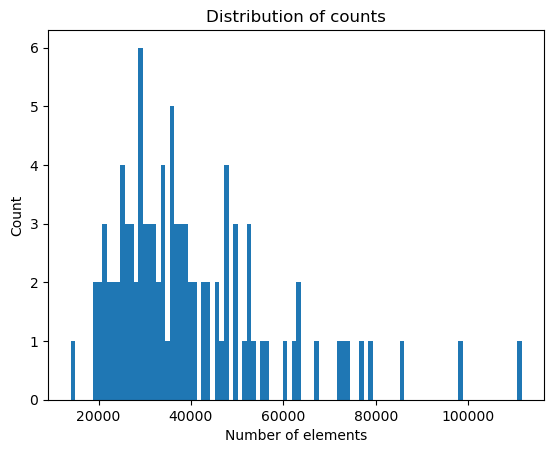

In [41]:
plt.hist(kmeans_counts, bins=K)
plt.xlabel('Number of elements')
plt.ylabel('Count')
plt.title('Distribution of number of elements for centroids')
plt.show()

Epoch 1/15
250/250 [==============================] - 2s 7ms/step - loss: 1.6811 - accuracy: 0.4005 - val_loss: 1.4882 - val_accuracy: 0.4681
Epoch 2/15
250/250 [==============================] - 2s 7ms/step - loss: 1.4532 - accuracy: 0.4832 - val_loss: 1.3929 - val_accuracy: 0.5057
Epoch 3/15
250/250 [==============================] - 2s 7ms/step - loss: 1.3522 - accuracy: 0.5209 - val_loss: 1.3421 - val_accuracy: 0.5216
Epoch 4/15
250/250 [==============================] - 2s 7ms/step - loss: 1.2801 - accuracy: 0.5458 - val_loss: 1.3290 - val_accuracy: 0.5302
Epoch 5/15
250/250 [==============================] - 2s 7ms/step - loss: 1.2116 - accuracy: 0.5675 - val_loss: 1.3188 - val_accuracy: 0.5296
Epoch 6/15
250/250 [==============================] - 2s 7ms/step - loss: 1.1553 - accuracy: 0.5902 - val_loss: 1.2973 - val_accuracy: 0.5465
Epoch 7/15
250/250 [==============================] - 2s 7ms/step - loss: 1.0984 - accuracy: 0.6067 - val_loss: 1.3058 - val_accuracy: 0.5506
Epoch 

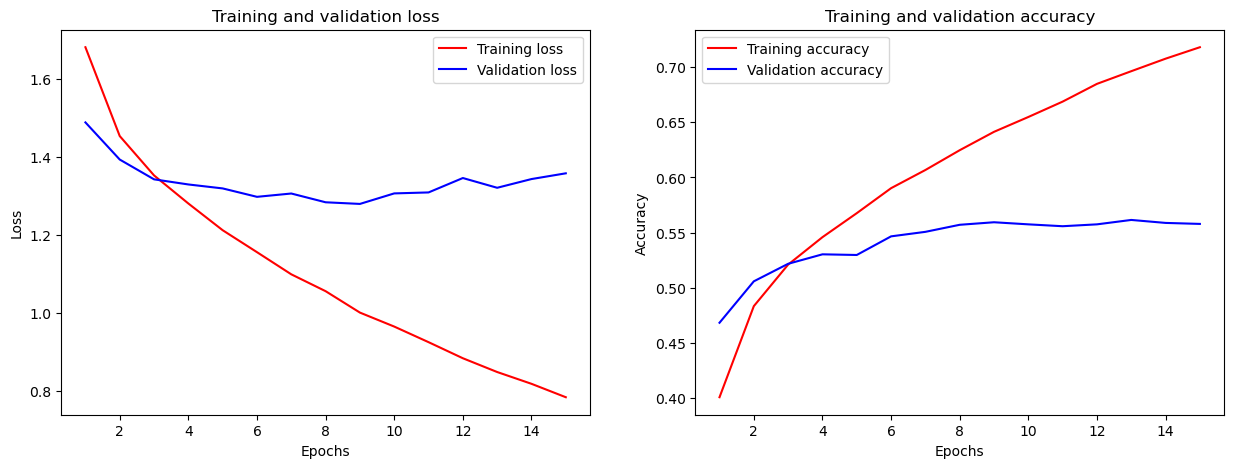

In [28]:
tf.keras.utils.set_random_seed(69)

M = X_trn_features.shape[1]
DROPOUT = 0.18

model = Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(M,)),
    keras.layers.Dropout(DROPOUT),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(DROPOUT),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(DROPOUT),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_trn_features, y_trn_categorical, batch_size=200, epochs=150, verbose=1, validation_data=(X_tst_features, y_tst_categorical))

loss, accuracy = model.evaluate(X_tst_features, y_tst_categorical, verbose=0)
print('Accuracy:', accuracy)
plot_history(history)

In [ ]:
input_str = history

# Split the string into individual lines
lines = input_str.strip().split('\n')

# Initialize the lists for indices and accuracies
indices = []
accuracies = []

# Iterate over each line and extract the index and accuracy
for line in lines:
    index_str, accuracy_str = line.split('\t')
    index = int(index_str.strip('[]'))
    accuracy = float(accuracy_str.strip())
    indices.append(index)
    accuracies.append(accuracy)

plt.plot(indices,accuracies)

In [ ]:
history = """
[0]	validation_0-merror:0.63950
[1]	validation_0-merror:0.59930
[2]	validation_0-merror:0.57680
[3]	validation_0-merror:0.55780
[4]	validation_0-merror:0.54220
[5]	validation_0-merror:0.53490
[6]	validation_0-merror:0.52710
[7]	validation_0-merror:0.52420
[8]	validation_0-merror:0.51860
[9]	validation_0-merror:0.51290
[10]	validation_0-merror:0.50550
[11]	validation_0-merror:0.49900
[12]	validation_0-merror:0.49650
[13]	validation_0-merror:0.49450
[14]	validation_0-merror:0.49320
[15]	validation_0-merror:0.48780
[16]	validation_0-merror:0.48520
[17]	validation_0-merror:0.48320
[18]	validation_0-merror:0.48050
[19]	validation_0-merror:0.47830
[20]	validation_0-merror:0.47910
[21]	validation_0-merror:0.47420
[22]	validation_0-merror:0.47200
[23]	validation_0-merror:0.46960
[24]	validation_0-merror:0.46730
[25]	validation_0-merror:0.46450
[26]	validation_0-merror:0.46560
[27]	validation_0-merror:0.46150
[28]	validation_0-merror:0.45970
[29]	validation_0-merror:0.45710
[30]	validation_0-merror:0.45660
[31]	validation_0-merror:0.45370
[32]	validation_0-merror:0.45390
[33]	validation_0-merror:0.45160
[34]	validation_0-merror:0.45070
[35]	validation_0-merror:0.44760
[36]	validation_0-merror:0.44720
[37]	validation_0-merror:0.44600
[38]	validation_0-merror:0.44450
[39]	validation_0-merror:0.44340
[40]	validation_0-merror:0.44240
[41]	validation_0-merror:0.44190
[42]	validation_0-merror:0.43960
[43]	validation_0-merror:0.43880
[44]	validation_0-merror:0.43760
[45]	validation_0-merror:0.43620
[46]	validation_0-merror:0.43620
[47]	validation_0-merror:0.43500
[48]	validation_0-merror:0.43280
[49]	validation_0-merror:0.43280
[50]	validation_0-merror:0.43150
[51]	validation_0-merror:0.42970
[52]	validation_0-merror:0.42760
[53]	validation_0-merror:0.42750
[54]	validation_0-merror:0.42650
[55]	validation_0-merror:0.42520
[56]	validation_0-merror:0.42360
[57]	validation_0-merror:0.42220
[58]	validation_0-merror:0.42200
[59]	validation_0-merror:0.42280
[60]	validation_0-merror:0.42210
[61]	validation_0-merror:0.42070
[62]	validation_0-merror:0.42000
[63]	validation_0-merror:0.42050
[64]	validation_0-merror:0.41990
[65]	validation_0-merror:0.41860
[66]	validation_0-merror:0.41800
[67]	validation_0-merror:0.41680
[68]	validation_0-merror:0.41580
[69]	validation_0-merror:0.41470
[70]	validation_0-merror:0.41310
[71]	validation_0-merror:0.41300
[72]	validation_0-merror:0.41100
[73]	validation_0-merror:0.41120
[74]	validation_0-merror:0.41140
[75]	validation_0-merror:0.41180
[76]	validation_0-merror:0.40990
[77]	validation_0-merror:0.40890
[78]	validation_0-merror:0.40750
[79]	validation_0-merror:0.40720
[80]	validation_0-merror:0.40680
[81]	validation_0-merror:0.40680
[82]	validation_0-merror:0.40690
[83]	validation_0-merror:0.40850
[84]	validation_0-merror:0.40840
[85]	validation_0-merror:0.40690
[86]	validation_0-merror:0.40620
[87]	validation_0-merror:0.40520
[88]	validation_0-merror:0.40500
[89]	validation_0-merror:0.40270
[90]	validation_0-merror:0.40190
[91]	validation_0-merror:0.40250
[92]	validation_0-merror:0.40260
[93]	validation_0-merror:0.40240
[94]	validation_0-merror:0.40100
[95]	validation_0-merror:0.40070
[96]	validation_0-merror:0.40060
[97]	validation_0-merror:0.39980
[98]	validation_0-merror:0.39950
[99]	validation_0-merror:0.39890
[100]	validation_0-merror:0.39940
[101]	validation_0-merror:0.39810
[102]	validation_0-merror:0.39940
[103]	validation_0-merror:0.39900
[104]	validation_0-merror:0.39850
[105]	validation_0-merror:0.39680
[106]	validation_0-merror:0.39690
[107]	validation_0-merror:0.39630
[108]	validation_0-merror:0.39580
[109]	validation_0-merror:0.39510
[110]	validation_0-merror:0.39480
[111]	validation_0-merror:0.39440
[112]	validation_0-merror:0.39510
[113]	validation_0-merror:0.39500
[114]	validation_0-merror:0.39560
[115]	validation_0-merror:0.39450
[116]	validation_0-merror:0.39330
[117]	validation_0-merror:0.39360
[118]	validation_0-merror:0.39370
[119]	validation_0-merror:0.39370
[120]	validation_0-merror:0.39300
[121]	validation_0-merror:0.39300
[122]	validation_0-merror:0.39200
[123]	validation_0-merror:0.39180
[124]	validation_0-merror:0.39100
[125]	validation_0-merror:0.39170
[126]	validation_0-merror:0.39120
[127]	validation_0-merror:0.39140
[128]	validation_0-merror:0.39150
[129]	validation_0-merror:0.39100
[130]	validation_0-merror:0.39000
[131]	validation_0-merror:0.38890
[132]	validation_0-merror:0.38880
[133]	validation_0-merror:0.38750
[134]	validation_0-merror:0.38760
[135]	validation_0-merror:0.38740
[136]	validation_0-merror:0.38770
[137]	validation_0-merror:0.38760
[138]	validation_0-merror:0.38790
[139]	validation_0-merror:0.38690
[140]	validation_0-merror:0.38700
[141]	validation_0-merror:0.38640
[142]	validation_0-merror:0.38620
[143]	validation_0-merror:0.38630
[144]	validation_0-merror:0.38550
[145]	validation_0-merror:0.38550
[146]	validation_0-merror:0.38520
[147]	validation_0-merror:0.38470
[148]	validation_0-merror:0.38550
[149]	validation_0-merror:0.38470
[150]	validation_0-merror:0.38470
[151]	validation_0-merror:0.38450
[152]	validation_0-merror:0.38350
[153]	validation_0-merror:0.38180
[154]	validation_0-merror:0.38310
[155]	validation_0-merror:0.38240
[156]	validation_0-merror:0.38230
[157]	validation_0-merror:0.38070
[158]	validation_0-merror:0.38100
[159]	validation_0-merror:0.38240
[160]	validation_0-merror:0.38180
[161]	validation_0-merror:0.38210
[162]	validation_0-merror:0.38260
[163]	validation_0-merror:0.38200
[164]	validation_0-merror:0.38150
[165]	validation_0-merror:0.38190
[166]	validation_0-merror:0.38170
[167]	validation_0-merror:0.38150
[168]	validation_0-merror:0.38070
[169]	validation_0-merror:0.38130
[170]	validation_0-merror:0.38050
[171]	validation_0-merror:0.38000
[172]	validation_0-merror:0.38080
[173]	validation_0-merror:0.38020
[174]	validation_0-merror:0.38110
[175]	validation_0-merror:0.38080
[176]	validation_0-merror:0.38070
[177]	validation_0-merror:0.38010
[178]	validation_0-merror:0.38170
[179]	validation_0-merror:0.38120
[180]	validation_0-merror:0.38110
[181]	validation_0-merror:0.38060
[182]	validation_0-merror:0.38010
[183]	validation_0-merror:0.37990
[184]	validation_0-merror:0.38020
[185]	validation_0-merror:0.37970
[186]	validation_0-merror:0.37950
[187]	validation_0-merror:0.38040
[188]	validation_0-merror:0.37950
[189]	validation_0-merror:0.37850
[190]	validation_0-merror:0.37900
[191]	validation_0-merror:0.37930
[192]	validation_0-merror:0.37850
[193]	validation_0-merror:0.37780
[194]	validation_0-merror:0.37830
[195]	validation_0-merror:0.37810
[196]	validation_0-merror:0.37810
[197]	validation_0-merror:0.37890
[198]	validation_0-merror:0.37780
[199]	validation_0-merror:0.37810
[200]	validation_0-merror:0.37700
[201]	validation_0-merror:0.37660
[202]	validation_0-merror:0.37660
[203]	validation_0-merror:0.37650
[204]	validation_0-merror:0.37680
[205]	validation_0-merror:0.37610
[206]	validation_0-merror:0.37600
[207]	validation_0-merror:0.37560
[208]	validation_0-merror:0.37500
[209]	validation_0-merror:0.37480
[210]	validation_0-merror:0.37490
[211]	validation_0-merror:0.37540
[212]	validation_0-merror:0.37490
[213]	validation_0-merror:0.37430
[214]	validation_0-merror:0.37510
[215]	validation_0-merror:0.37520
[216]	validation_0-merror:0.37480
[217]	validation_0-merror:0.37470
[218]	validation_0-merror:0.37490
[219]	validation_0-merror:0.37480
Accuracy: 0.6252
"""